In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
data = pd.read_csv('C:\\Users\\honey\\Desktop\\Projects\\nlp\\dataUTF.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,I went and saw this movie last night after bei...,Positive
1,"I admit, the great majority of films released ...",Negative
2,Story of a man who has unnatural feelings for ...,Negative
3,"I saw the capsule comment said ""great acting.""...",Negative
4,If I had not read Pat Barker's 'Union Street' ...,Negative


In [3]:
data.shape

(49, 2)

In [4]:
data.sentiment.value_counts()

Negative    25
Positive    24
Name: sentiment, dtype: int64

In [5]:
# Splitting the dataset into train and test set
train, test = train_test_split(data,test_size = 0.2)
# Removing neutral sentiments
train = train[train.sentiment != "Neutral"]

Positive words


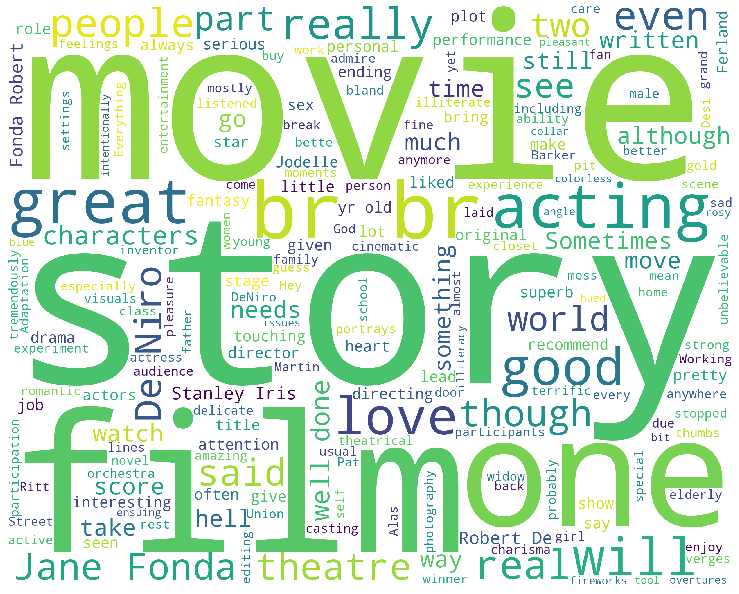

Negative words


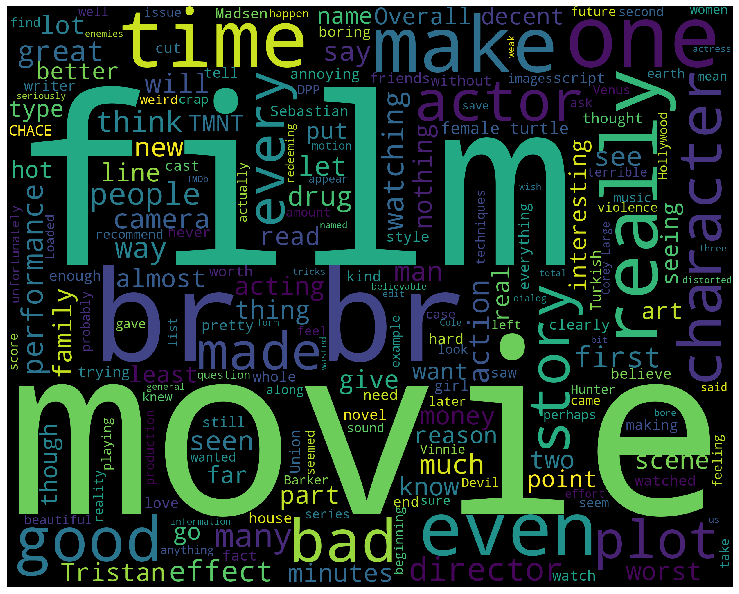

In [6]:
train_pos = train[ train['sentiment'] == 'Positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'Negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [7]:
nltk.download('stopwords')

reviews = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    reviews.append((words_without_stopwords, row.sentiment))

test = pd.read_csv('C:\\Users\\honey\\Desktop\\Projects\\nlp\\dataUTFtest.csv')    

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\honey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\honey\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
# Extracting word features
def get_words_in_reviews(reviews):
    all = []
    for (words, sentiment) in reviews:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_reviews(reviews))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

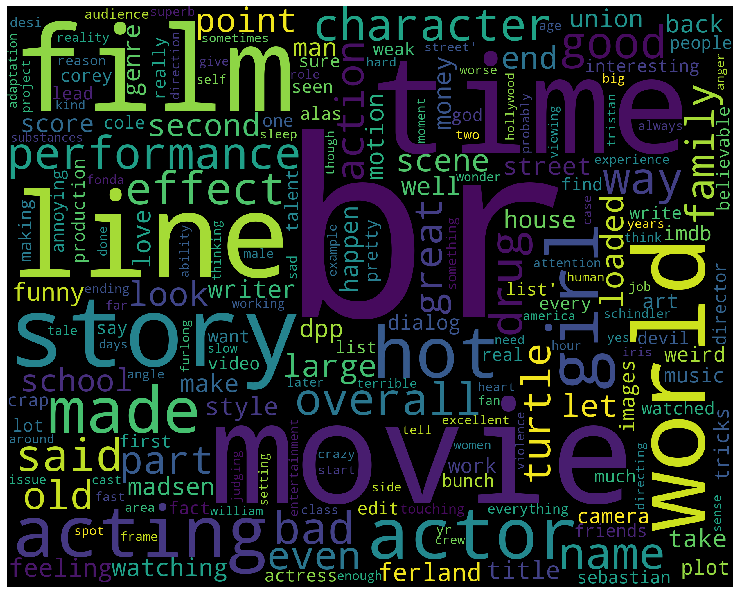

In [9]:
wordcloud_draw(w_features)


In [10]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,reviews)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [16]:
neg_cnt = 0
pos_cnt = 0
for obj in test: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))    

[Negative]: 0/0 
[Positive]: 0/2 


In [12]:
if (pos_cnt > neg_cnt):
    print("Sentiment Analysed : Positive")
if (pos_cnt < neg_cnt):
    print("Sentiment Analysed : Negative")
if (pos_cnt == neg_cnt):
    print("Sentiment Analysed : Neutral")

Sentiment Analysed : Positive
